In [ ]:
#双均线：对每一个交易日，计算前n天的移动平均值，然后把移动平均值连起来， 一般有5天，10天（日均线指标）， 30天， 60天（季均线指标），120天
#（年均线指标）
#金叉（交点）：短期均线上叉长期均线，买入信号
#死叉：短期均线下穿长期均线，卖出信号

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tushare as ts

In [9]:
df=ts.get_k_data('601318',start='2007-01-01')
df.to_csv('601318.csv')
df=pd.read_csv('601318.csv',index_col='date',parse_dates=['date'])[['open','close','low','high']]

In [55]:
#五日均线和30日均线 2 methods
df['ma5']=np.nan
df['ma30']=np.nan
#for i in range(4,len(df)):
    #df.loc[df.index[i],'ma5']=df['close'][i-4:i+1].mean()

#for i in range(29,len(df)):
    #df.loc[df.index[i],'ma30']=df['close'][i-29:i+1].mean()
    
df['ma5']=df['open'].rolling(5).mean()
df['ma30']=df['open'].rolling(30).mean()

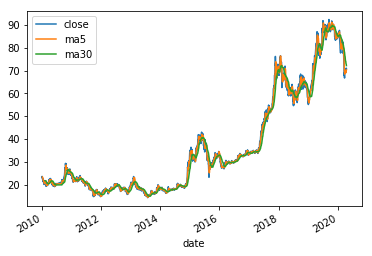

In [56]:
df[['close','ma5','ma30']].plot()
plt.show()

In [57]:
#分析输出所有金叉日期和死叉日期 2 methods
df=df.dropna()
df=df['2010-01-01':]
golden_cross=[]
death_cross=[]
#for i in range(1,len(df)):
    #if df['ma5'][i]>=df['ma30'][i] and df['ma5'][i-1]<df['ma30'][i-1]:
        #golden_cross.append(df.index[i])
    #if df['ma5'][i]<=df['ma30'][i] and df['ma5'][i-1]>df['ma30'][i-1]:
        #death_cross.append(df.index[i])

#用布尔值来做 T-->T 死叉 F-->F 金叉
sr1=df['ma5']<df['ma30']  
sr2=df['ma5']>=df['ma30'] 
#shift sr2 to the right by one 
death_cross=df[sr1 & sr2.shift(1)].index
goldne_cross=df[~(sr1 |sr2.shift(1))].index

golden_cross
death_cross

DatetimeIndex(['2010-04-30', '2010-11-17', '2010-12-21', '2011-02-24',
               '2011-03-18', '2011-05-05', '2011-07-25', '2011-11-22',
               '2012-03-09', '2012-06-06', '2012-07-27', '2012-09-18',
               '2012-10-30', '2013-02-26', '2013-04-25', '2013-05-15',
               '2013-10-09', '2013-10-18', '2013-12-24', '2014-01-29',
               '2014-05-21', '2014-06-27', '2014-08-27', '2014-09-15',
               '2015-02-02', '2015-05-19', '2015-06-03', '2015-06-19',
               '2015-12-02', '2015-12-10', '2016-01-06', '2016-05-09',
               '2016-06-28', '2016-08-09', '2016-09-30', '2016-12-21',
               '2017-03-03', '2017-04-14', '2017-08-11', '2017-09-21',
               '2017-12-08', '2017-12-19', '2018-01-02', '2018-02-05',
               '2018-02-08', '2018-03-29', '2018-06-25', '2018-08-08',
               '2018-08-16', '2018-10-16', '2018-10-31', '2018-11-15',
               '2018-11-21', '2019-05-10', '2019-08-05', '2019-09-27',
      

In [58]:
#从2010/1/1起，100000初始资金，金叉买入，死叉卖出，收益率如何
first_money=100000
money=first_money
hold=0
sr1=pd.Series(1,index=golden_cross)
sr2=pd.Series(0,index=death_cross)
sr=sr1.append(sr2).sort_index()
for i in range(0,len(sr)):
    price=df['open'][sr.index[i]]
    if sr.iloc[i]==1:
        buy=money//(100*price)
        hold+=buy*100
        money-=buy*100*price
    else:
        money+=hold*price
        hold=0

price=df['open'][-1]
now_money=hold*price+money
print(now_money-first_money)       

0.0
